# Weather Prediction

In [36]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# reading the datasets

df1 = pd.read_csv("weatherHistory.csv")

In [5]:
df1.shape

(51990, 11)

# Data Preprocessing

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51990 entries, 0 to 51989
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            51990 non-null  object 
 1   Summary                   51990 non-null  object 
 2   Precip Type               51990 non-null  object 
 3   Temperature (C)           51990 non-null  float64
 4   Apparent Temperature (C)  51990 non-null  float64
 5   Humidity                  51990 non-null  float64
 6   Wind Speed (km/h)         51990 non-null  float64
 7   Wind Bearing (degrees)    51990 non-null  int64  
 8   Visibility (km)           51990 non-null  float64
 9   Pressure (millibars)      51990 non-null  float64
 10  Daily Summary             51990 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 4.4+ MB


In [7]:
df1.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 22:00:00.000 +0200,Partly Cloudy,rain,10.116667,10.116667,0.79,6.6493,163,15.8263,1015.40,Partly cloudy throughout the day.
1,2006-04-01 23:00:00.000 +0200,Mostly Cloudy,rain,10.200000,10.200000,0.77,3.9284,152,14.9569,1015.51,Partly cloudy throughout the day.
2,2006-04-10 00:00:00.000 +0200,Partly Cloudy,rain,10.422222,10.422222,0.62,16.9855,150,15.8263,1014.40,Mostly cloudy throughout the day.
3,2006-04-10 01:00:00.000 +0200,Partly Cloudy,rain,9.911111,7.566667,0.66,17.2109,149,15.8263,1014.20,Mostly cloudy throughout the day.
4,2006-04-10 02:00:00.000 +0200,Mostly Cloudy,rain,11.183333,11.183333,0.80,10.8192,163,14.9569,1008.71,Mostly cloudy throughout the day.


In [8]:
df1.tail(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
51985,2011-09-13 23:00:00.000 +0200,Clear,rain,16.505556,16.505556,0.76,3.0751,175,14.9569,1014.38,Partly cloudy until morning.
51986,2011-09-14 00:00:00.000 +0200,Clear,rain,16.577778,16.577778,0.78,3.2200,170,15.8263,1014.58,Partly cloudy starting in the afternoon.
51987,2011-09-14 01:00:00.000 +0200,Clear,rain,15.027778,15.027778,0.83,0.0000,0,15.8263,1014.58,Partly cloudy starting in the afternoon.
51988,2011-09-14 02:00:00.000 +0200,Partly Cloudy,rain,17.477778,17.477778,0.77,10.4167,329,14.9569,1015.25,Partly cloudy starting in the afternoon.
51989,2011-09-14 03:00:00.000 +0200,Clear,rain,13.916667,13.916667,0.86,3.2200,40,15.8263,1014.69,Partly cloudy starting in the afternoon.


In [9]:
#count the number of instances of each class label
count=df1['Humidity'].value_counts()

# Calculate the percentage of each class
percentage = count * 100 / len(df1)

#printing the class label counts and percentages
print("Class label counts: \n",count)
print("Class label percentages: \n",percentage)

# Determine if the data is balanced or imbalanced
if (percentage.iloc[0] < 60 and percentage.iloc[1] < 60) or (percentage.iloc[0] > 40 and percentage.iloc[1] > 40):
    print("The data is balanced")
else:
    print("The data is imbalanced")    

Class label counts: 
 0.93    2992
0.92    2418
0.96    2050
0.89    1678
0.86    1548
        ... 
0.15       7
0.16       6
0.00       5
0.14       3
0.13       1
Name: Humidity, Length: 89, dtype: int64
Class label percentages: 
 0.93    5.754953
0.92    4.650894
0.96    3.943066
0.89    3.227544
0.86    2.977496
          ...   
0.15    0.013464
0.16    0.011541
0.00    0.009617
0.14    0.005770
0.13    0.001923
Name: Humidity, Length: 89, dtype: float64
The data is balanced


In [10]:
df1.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Daily Summary'],
      dtype='object')

In [11]:
# Creating the Data Dictionary with first column being datatype.

Data_dict = pd.DataFrame(df1.dtypes)
Data_dict

,0
Formatted Date,object
Summary,object
Precip Type,object
Temperature (C),float64
Apparent Temperature (C),float64
Humidity,float64
Wind Speed (km/h),float64
Wind Bearing (degrees),int64
Visibility (km),float64
Pressure (millibars),float64


In [12]:
# identifying the missing values from the dataset.

Data_dict['MissingVal'] = df1.isnull().sum()
Data_dict

,0,MissingVal
Formatted Date,object,0
Summary,object,0
Precip Type,object,0
Temperature (C),float64,0
Apparent Temperature (C),float64,0
Humidity,float64,0
Wind Speed (km/h),float64,0
Wind Bearing (degrees),int64,0
Visibility (km),float64,0
Pressure (millibars),float64,0


In [13]:
# Identifying unique values 

Data_dict['UniqueVal'] = df1.nunique()
Data_dict

,0,MissingVal,UniqueVal
Formatted Date,object,0,51966
Summary,object,0,21
Precip Type,object,0,2
Temperature (C),float64,0,6871
Apparent Temperature (C),float64,0,8198
Humidity,float64,0,89
Wind Speed (km/h),float64,0,2313
Wind Bearing (degrees),int64,0,360
Visibility (km),float64,0,864
Pressure (millibars),float64,0,4642


In [14]:
# identifying count of the variable.

Data_dict['Count'] = df1.count()
Data_dict

,0,MissingVal,UniqueVal,Count
Formatted Date,object,0,51966,51990
Summary,object,0,21,51990
Precip Type,object,0,2,51990
Temperature (C),float64,0,6871,51990
Apparent Temperature (C),float64,0,8198,51990
Humidity,float64,0,89,51990
Wind Speed (km/h),float64,0,2313,51990
Wind Bearing (degrees),int64,0,360,51990
Visibility (km),float64,0,864,51990
Pressure (millibars),float64,0,4642,51990


In [15]:
df1.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,51990.000000,51990.000000,51990.000000,51990.000000,51990.000000,51990.000000,51990.000000
mean,11.660597,10.569183,0.734411,10.806902,189.665532,9.827860,1003.758146
std,9.633998,10.776429,0.192854,6.986637,107.371633,3.848242,115.311578
min,-16.666667,-24.233333,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.088889,1.923611,0.610000,5.635000,117.250000,8.130500,1011.790000
50%,11.602778,11.602778,0.780000,9.821000,184.000000,9.982000,1016.570000
75%,18.733333,18.733333,0.890000,14.168000,290.000000,11.270000,1021.450000
max,39.905556,38.377778,1.000000,63.852600,359.000000,16.100000,1046.380000


In [16]:
# Calculate Z-scores for each column

z_scores = (df1 - df1.mean()) / df1.std()

# Find outliers (|Z-score| > 3)
outliers = np.abs(z_scores) > 3

# Find total number of outliers for each column 
col_outliers = outliers.sum(axis=0)

print("Outliers per column:")
for col in df1.columns:
    print(f"{col}: {col_outliers[col]}")

Outliers per column:
Formatted Date: 0
Summary: 0
Precip Type: 0
Temperature (C): 0
Apparent Temperature (C): 12
Humidity: 16
Wind Speed (km/h): 664
Wind Bearing (degrees): 0
Visibility (km): 0
Pressure (millibars): 674
Daily Summary: 0


In [18]:
# Calculate Z-scores for each column
z_scores = (df1 - df1.mean()) / df1.std()

# Find outliers (|Z-score| > 3)
outliers = np.abs(z_scores) > 3

# Replace outliers with NaN
df1[outliers] = np.nan

# Replace NaN with median value of each column
median_vals = df1.median()
df1 = df1.fillna(median_vals)

# Find total number of replaced outliers for each column 
col_replaced = outliers.sum(axis=0)

print("Replaced outliers per column:")
for col in df1.columns:
    print(f"{col}: {col_replaced[col]}")


Replaced outliers per column:
Formatted Date: 0
Summary: 0
Precip Type: 0
Temperature (C): 0
Apparent Temperature (C): 2
Humidity: 0
Wind Speed (km/h): 240
Wind Bearing (degrees): 0
Visibility (km): 0
Pressure (millibars): 470
Daily Summary: 0


In [19]:
# Numerical Columns
num_attr = df1.select_dtypes(['int']).columns  
num_attr

Index(['Wind Bearing (degrees)'], dtype='object')

In [20]:
# Categorical Columns
cat_attr = df1.select_dtypes('object').columns
cat_attr

Index(['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'], dtype='object')

In [31]:
# Quantitative variables
quantitative = df1.select_dtypes(include = ["int","float"]).columns
quantitative

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)'],
      dtype='object')

In [21]:
# create a copy of the original dataframe
new_df1 = df1.copy()

# get a list of the categorical columns
cat_cols = df1.select_dtypes(include=['object']).columns.tolist()

# perform label encoding
for col in cat_cols:
    new_df1[col] = pd.factorize(df1[col])[0]
new_df1

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,0,0,0,10.116667,10.116667,0.79,6.6493,163,15.8263,1015.40,0
1,1,1,0,10.200000,10.200000,0.77,3.9284,152,14.9569,1015.51,0
2,2,0,0,10.422222,10.422222,0.62,16.9855,150,15.8263,1014.40,1
3,3,0,0,9.911111,7.566667,0.66,17.2109,149,15.8263,1014.20,1
4,4,1,0,11.183333,11.183333,0.80,10.8192,163,14.9569,1008.71,1
...,...,...,...,...,...,...,...,...,...,...,...
51985,51961,5,0,16.505556,16.505556,0.76,3.0751,175,14.9569,1014.38,16
51986,51962,5,0,16.577778,16.577778,0.78,3.2200,170,15.8263,1014.58,14
51987,51963,5,0,15.027778,15.027778,0.83,0.0000,0,15.8263,1014.58,14
51988,51964,0,0,17.477778,17.477778,0.77,10.4167,329,14.9569,1015.25,14


In [22]:
new_df1.dtypes

Formatted Date                int64
Summary                       int64
Precip Type                   int64
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)        int64
Visibility (km)             float64
Pressure (millibars)        float64
Daily Summary                 int64
dtype: object

In [23]:
new_df1= new_df1.astype('float64')

In [24]:
new_df1.dtypes

Formatted Date              float64
Summary                     float64
Precip Type                 float64
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Pressure (millibars)        float64
Daily Summary               float64
dtype: object

In [25]:
new_df1

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,0.0,0.0,0.0,10.116667,10.116667,0.79,6.6493,163.0,15.8263,1015.40,0.0
1,1.0,1.0,0.0,10.200000,10.200000,0.77,3.9284,152.0,14.9569,1015.51,0.0
2,2.0,0.0,0.0,10.422222,10.422222,0.62,16.9855,150.0,15.8263,1014.40,1.0
3,3.0,0.0,0.0,9.911111,7.566667,0.66,17.2109,149.0,15.8263,1014.20,1.0
4,4.0,1.0,0.0,11.183333,11.183333,0.80,10.8192,163.0,14.9569,1008.71,1.0
...,...,...,...,...,...,...,...,...,...,...,...
51985,51961.0,5.0,0.0,16.505556,16.505556,0.76,3.0751,175.0,14.9569,1014.38,16.0
51986,51962.0,5.0,0.0,16.577778,16.577778,0.78,3.2200,170.0,15.8263,1014.58,14.0
51987,51963.0,5.0,0.0,15.027778,15.027778,0.83,0.0000,0.0,15.8263,1014.58,14.0
51988,51964.0,0.0,0.0,17.477778,17.477778,0.77,10.4167,329.0,14.9569,1015.25,14.0


In [32]:
df1[quantitative].describe() 

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,51990.000000,51990.000000,51990.000000,51990.000000,51990.000000,51990.000000,51990.000000
mean,11.660597,10.578419,0.734621,10.368491,189.665532,9.827860,1016.991100
std,9.633998,10.762596,0.192531,6.178138,107.371633,3.848242,7.560822
min,-16.666667,-21.555556,0.160000,0.000000,0.000000,0.000000,993.100000
25%,4.088889,1.938889,0.610000,5.635000,117.250000,8.130500,1012.190000
50%,11.602778,11.605556,0.780000,9.708300,184.000000,9.982000,1016.675000
75%,18.733333,18.733333,0.890000,13.958700,290.000000,11.270000,1021.370000
max,39.905556,38.377778,1.000000,29.430800,359.000000,16.100000,1040.800000


# Data Visualization

array([[<AxesSubplot:title={'center':'Temperature (C)'}>,
        <AxesSubplot:title={'center':'Apparent Temperature (C)'}>,
        <AxesSubplot:title={'center':'Humidity'}>],
       [<AxesSubplot:title={'center':'Wind Speed (km/h)'}>,
        <AxesSubplot:title={'center':'Wind Bearing (degrees)'}>,
        <AxesSubplot:title={'center':'Visibility (km)'}>],
       [<AxesSubplot:title={'center':'Pressure (millibars)'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

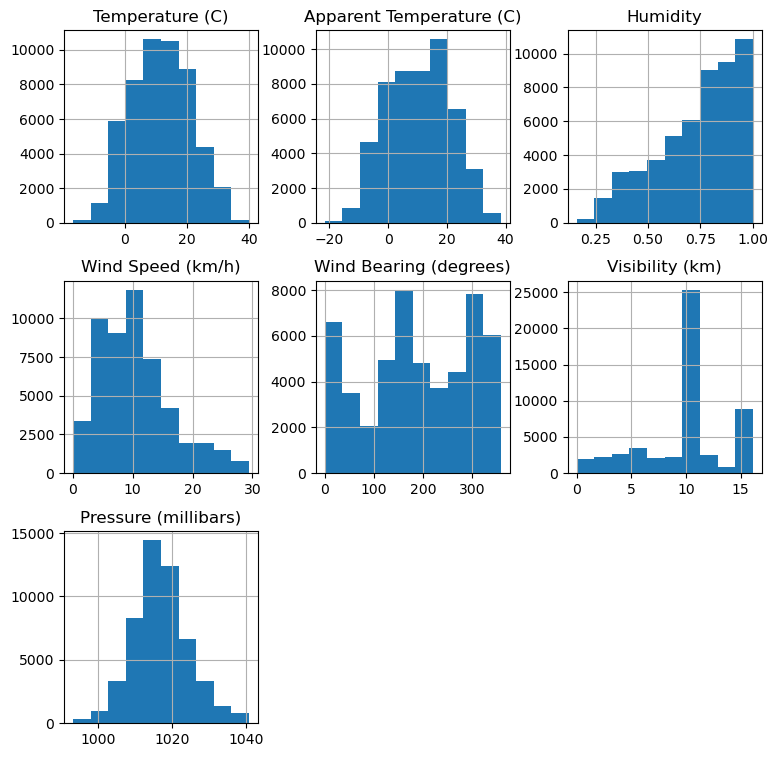

In [37]:
rcParams['figure.figsize'] = 9, 9
df1[quantitative].hist()

<AxesSubplot:xlabel='count', ylabel='Summary'>

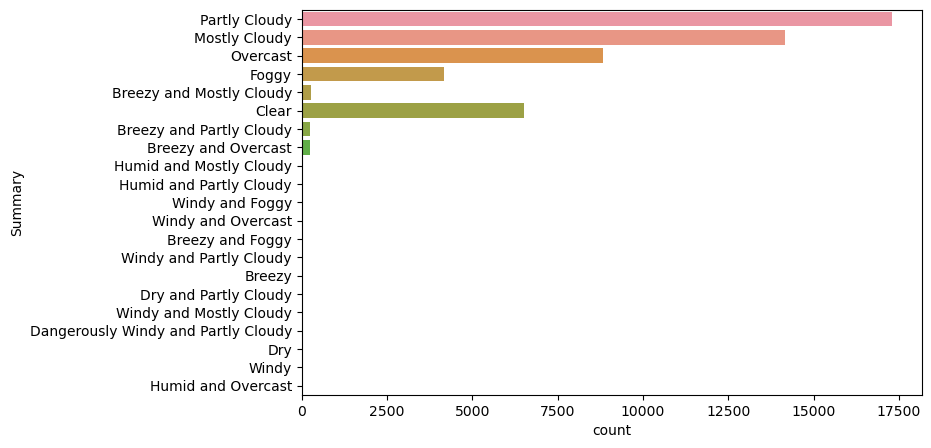

In [38]:
rcParams['figure.figsize'] = 8, 5
sns.countplot(y=df1['Summary'])

In [41]:
df1['Precip Type'].value_counts(dropna=False)

rain    45409
snow     6581
Name: Precip Type, dtype: int64

<AxesSubplot:xlabel='Precip Type', ylabel='count'>

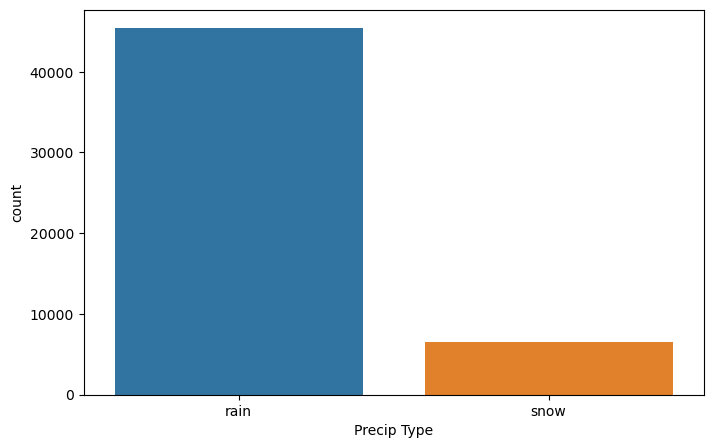

In [40]:
sns.countplot(x=df1['Precip Type'])

<AxesSubplot:>

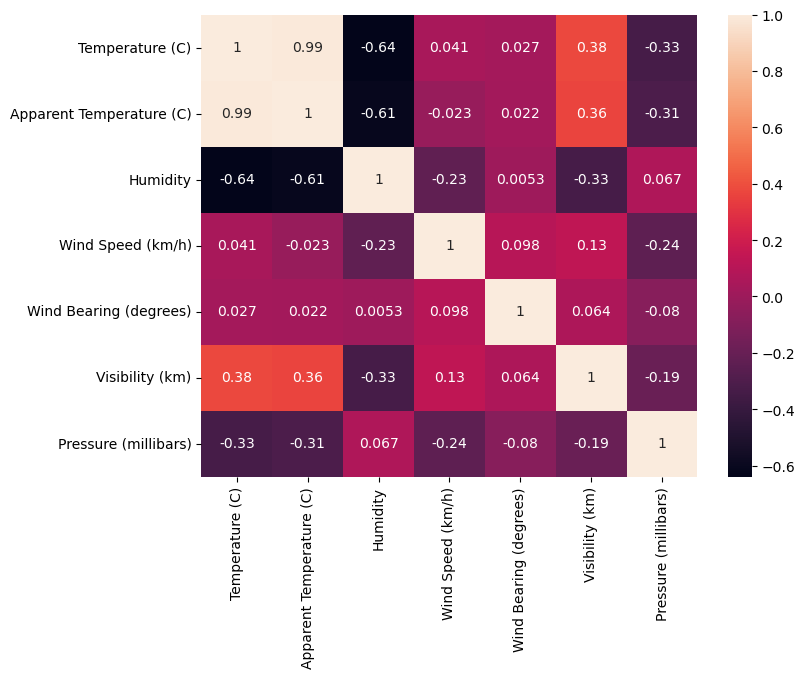

In [65]:
# Lets look at the correlation matrix of our data.
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
sns.heatmap(df1.corr(),annot=True)

# Model Evaluation

# Decision Tree Regression using OOPS

In [59]:
class DecisionTree:
    
    def __init__(self):
        self.tree = {}
    
    def find_best_split(self, X, y):
        n_features = X.shape[1]
        best_feature = None
        best_split = None
        best_mse = np.inf
        
        for feature in range(n_features):
            values = np.sort(np.unique(X[:, feature]))
            splits = (values[:-1] + values[1:]) / 2
            
            for split in splits:
                left_idx = X[:, feature] <= split
                right_idx = X[:, feature] > split
                
                left_y = y[left_idx]
                right_y = y[right_idx]
                
                if len(left_y) == 0 or len(right_y) == 0:
                    continue
                
                mse = ((left_y - np.mean(left_y))**2).sum() + ((right_y - np.mean(right_y))**2).sum()
                
                if mse < best_mse:
                    best_feature = feature
                    best_split = split
                    best_mse = mse
        
        return best_feature, best_split
    
    def fit(self, X, y):
        def build_tree(X, y, depth=0):
            if depth == 5:
                return np.mean(y)
            
            best_feature, best_split = self.find_best_split(X, y)
            
            if best_feature is None:
                return np.mean(y)
            
            left_idx = X[:, best_feature] <= best_split
            right_idx = X[:, best_feature] > best_split
            
            left = build_tree(X[left_idx], y[left_idx], depth+1)
            right = build_tree(X[right_idx], y[right_idx], depth+1)
            
            return {'feature': best_feature, 'split': best_split, 'left': left, 'right': right}
        
        self.tree = build_tree(X, y)
    
    def predict(self, X):
        def predict_sample(x, tree):
            if isinstance(tree, float):
                return tree
            
            if x[tree['feature']] <= tree['split']:
                return predict_sample(x, tree['left'])
            else:
                return predict_sample(x, tree['right'])
        
        return np.array([predict_sample(x, self.tree) for x in X])
        


In [60]:
# Split data into training and testing sets
train_data = new_df1.sample(frac=0.8, random_state=42)
test_data = new_df1.drop(train_data.index)

# Split training and testing data into X and y
train_X = train_data.drop('Humidity', axis=1).to_numpy()
train_y = train_data['Humidity'].to_numpy()

test_X = test_data.drop('Humidity', axis=1).to_numpy()
test_y = test_data['Humidity'].to_numpy()


In [61]:
import time
regressor = DecisionTree()

start_time = time.time()
regressor.fit(train_X, train_y)
end_time = time.time()

pred_y=regressor.predict(test_X)

In [62]:
# Assuming pred_y and test_y are the predicted and true values, respectively

# Calculate the mean absolute error
mae = np.mean(np.abs(pred_y - test_y))
print('Mean Absolute Error:', mae)

# Calculate the mean squared error 
mse = np.mean(np.abs(pred_y - test_y)**2)
print('Mean Squared Error:', mse)

# Calculate the mean absolute percentage error
mape = np.mean(np.abs((test_y - pred_y) / test_y)) * 100
print('Mean Absolute Percentage Error (MAPE):', mape)

# Calculate the residual sum of squares (RSS)
rss = np.sum((pred_y - test_y)**2)

# Calculate the total sum of squares (TSS)
tss = np.sum((test_y - np.mean(test_y))**2)

# Calculate the R-squared (R2) value
r2 = 1 - (rss / tss)
print('R-squared (R2):', r2)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean((pred_y - test_y)**2))
print('Root Mean Squared Error (RMSE):', rmse)

print("Time taken:", end_time - start_time, "seconds")

Mean Absolute Error: 0.0874532905013894
Mean Squared Error: 0.013504091847427357
Mean Absolute Percentage Error (MAPE): 14.520859272176336
R-squared (R2): 0.6381358219225713
Root Mean Squared Error (RMSE): 0.11620710755985349
Time taken: 132.25206422805786 seconds


# Decision tree regression Using sklearn

In [63]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error

# Define features and target
X = new_df1.drop('Humidity', axis=1)
y = new_df1['Humidity']

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import time
start_time = time.time()
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)
end_time = time.time()

# Predict on the test data
y_pred = dt_regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print('Mean Squared Error:', mse)
print("Mean Absolute Percentage Error (MAPE): ", mape)
print("R-squared (R2): ", r2)
print("Root Mean Squared Error (RMSE): ", rmse)

print("Time taken:", end_time - start_time, "seconds")

Mean Absolute Error: 0.07028370840546258
Mean Squared Error: 0.011565945374110407
Mean Absolute Percentage Error (MAPE):  0.10898863347630472
R-squared (R2):  0.6821676981132487
Root Mean Squared Error (RMSE):  0.107545085308955
Time taken: 0.5320663452148438 seconds


# Comparing the Model

In [74]:
print("Decision Tree Regression Result")
# code 1
result1 = [0.08745,0.013504,14.520859,0.6381358,0.116207,132.252064]
df1 = pd.DataFrame({'using OOPS ': result1})

# code 2
result2 = [0.07028, 0.011566, 0.108988,0.6822,0.107545,0.532066]
df2 = pd.DataFrame({'using sklearn': result2})

# code 3
result3 = ['Mean Absolute Error','Mean Squared Error','Mean Absolute Percentage Error','R-squared','Root Mean Squared Error','Time Stamp']
df3 = pd.DataFrame({'Column': result3})


# display the results in a table
df = pd.concat([df3, df1, df2,], axis=1)

print("\n")
print(df)

Decision Tree Regression Result


                           Column  using OOPS   using sklearn
0             Mean Absolute Error     0.087450       0.070280
1              Mean Squared Error     0.013504       0.011566
2  Mean Absolute Percentage Error    14.520859       0.108988
3                       R-squared     0.638136       0.682200
4         Root Mean Squared Error     0.116207       0.107545
5                      Time Stamp   132.252064       0.532066


# 1.Bar Plot

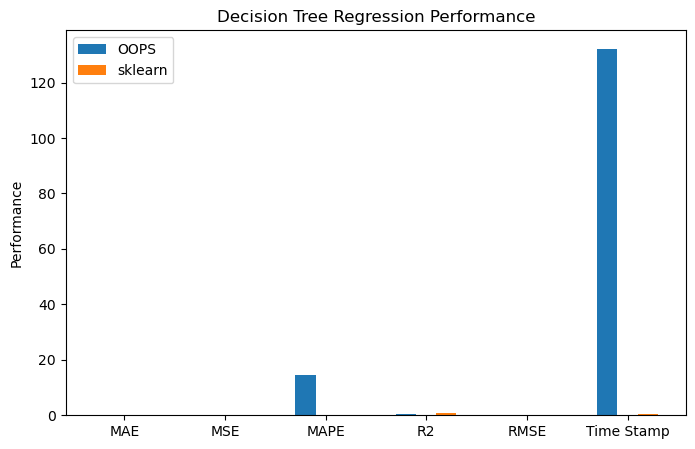

In [72]:
# Define the data for each scenario
OOPS = [0.08745,0.013504,14.520859,0.6381358,0.116207,132.252064]
sklearn = [0.07028, 0.011566, 0.108988,0.6822,0.107545,0.532066]

# Define the labels for each performance measure
labels = ['MAE','MSE','MAPE','R2','RMSE','Time Stamp']

# Define the x-axis ticks and group labels
x = np.arange(len(labels))
group_labels = ['OOPS','sklearn ']

# Define the bar width
width = 0.2

# Create the figure and axes objects
fig, ax = plt.subplots()

# Plot the bars for each scenario
ax.bar(x - width, OOPS, width, label='OOPS')
ax.bar(x + width, sklearn, width, label='sklearn')

# Add labels, title, and legend
ax.set_ylabel('Performance')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title('Decision Tree Regression Performance')
ax.legend()

# Show the plot
plt.show()

# 2.Line Graph

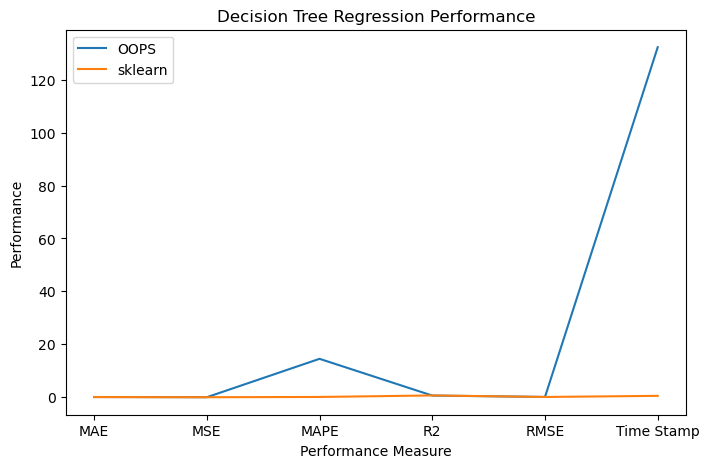

In [73]:
# Define the data for each scenario
OOPS = [0.08745,0.013504,14.520859,0.6381358,0.116207,132.252064]
sklearn = [0.07028, 0.011566, 0.108988,0.6822,0.107545,0.532066]

# Define the labels for each performance measure
labels = ['MAE','MSE','MAPE','R2','RMSE','Time Stamp']

# Define the x-axis ticks
x = np.arange(len(labels))

# Create the figure and axes objects
fig, ax = plt.subplots()

# Plot the lines for each scenario
ax.plot(x, OOPS, label='OOPS')
ax.plot(x, sklearn, label='sklearn')

# Add labels, title, and legend
ax.set_xlabel('Performance Measure')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Performance')
ax.set_title('Decision Tree Regression Performance')
ax.legend()

# Show the plot
plt.show()